## Fourier Transforms

The frequency components of an image can be displayed after doing a Fourier Transform (FT). An FT looks at the components of an image (edges that are high-frequency, and areas of smooth color as low-frequency), and plots the frequencies that occur as points in spectrum.

In fact, an FT treats patterns of intensity in an image as sine waves with a particular frequency, and you can look at an interesting visualization of these sine wave components [on this page](https://plus.maths.org/content/fourier-transforms-images).

In this notebook, we'll first look at a few simple image patterns to build up an idea of what image frequency components look like, and then transform a more complex image to see what it looks like in the frequency domain.

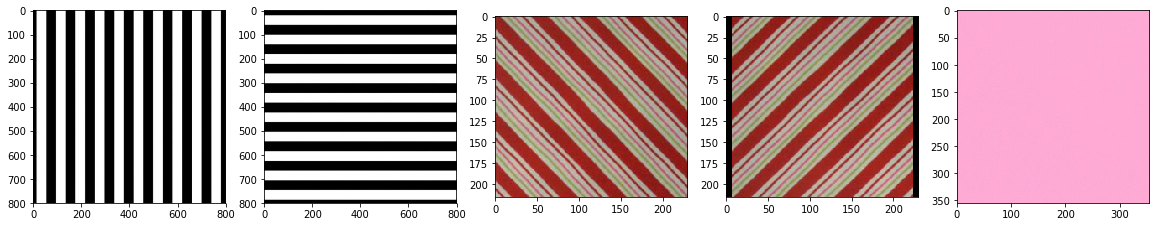

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils

%matplotlib inline

# Read in the images
image_stripes = cv2.imread('images/stripes.jpg')
# Change color to RGB (from BGR)
image_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_BGR2RGB)

#Flip the image by 90 degrees to view the Fountier Transform for the horizontal stripes image
image_stripes_horizontal = imutils.rotate(image_stripes,90);

# Read in the images
image_diagonal_stripes_original = cv2.imread('images/stripes_diagonal.JPG')
# Change color to RGB (from BGR)
image_stripes_diagonal = cv2.cvtColor(image_diagonal_stripes_original, cv2.COLOR_BGR2RGB)

#Flip the image by 90 degrees to view the Fountier Transform
image_stripes_diagonal_rotated = imutils.rotate(image_stripes_diagonal,90);


# Read in the images
image_solid = cv2.imread('images/pink_solid.jpg')
# Change color to RGB (from BGR)
image_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2RGB)


# Display the images
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(20,10))

ax1.imshow(image_stripes)
ax2.imshow(image_stripes_horizontal)
ax3.imshow(image_stripes_diagonal)
ax4.imshow(image_stripes_diagonal_rotated)
ax5.imshow(image_solid)

In [7]:
# convert to grayscale to focus on the intensity patterns in the image
gray_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_RGB2GRAY)
gray_stripes_horizontal = cv2.cvtColor(image_stripes_horizontal, cv2.COLOR_RGB2GRAY)
gray_stripes_diagonal = cv2.cvtColor(image_stripes_diagonal, cv2.COLOR_RGB2GRAY)
gray_stripes_diagonal_rotated = cv2.cvtColor(image_stripes_diagonal_rotated, cv2.COLOR_RGB2GRAY)
gray_solid = cv2.cvtColor(image_solid, cv2.COLOR_RGB2GRAY)



# normalize the image color values from a range of [0,255] to [0,1] for further processing
norm_stripes = gray_stripes/255.0
norm_stripes_horizontal = gray_stripes_horizontal/255.0
norm_stripes_diagonal = gray_stripes_diagonal/255.0
norm_stripes_diagonal_rotated = gray_stripes_diagonal_rotated/255.0
norm_solid = gray_solid/255.0


# perform a fast fourier transform and create a scaled, frequency transform image
def ft_image(norm_image):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    
    return frequency_tx


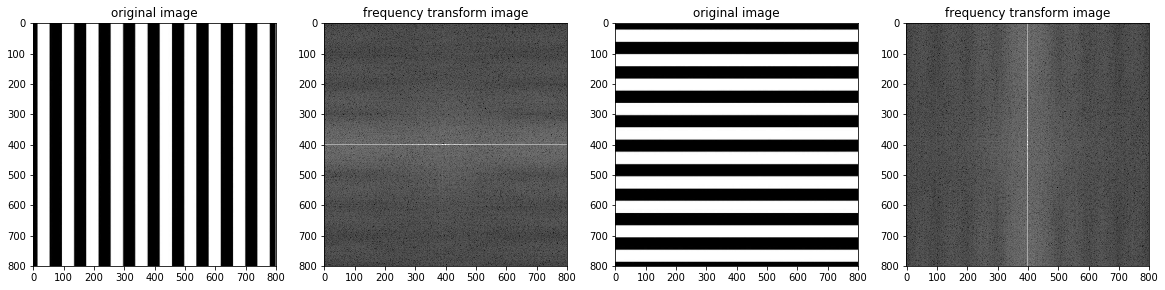

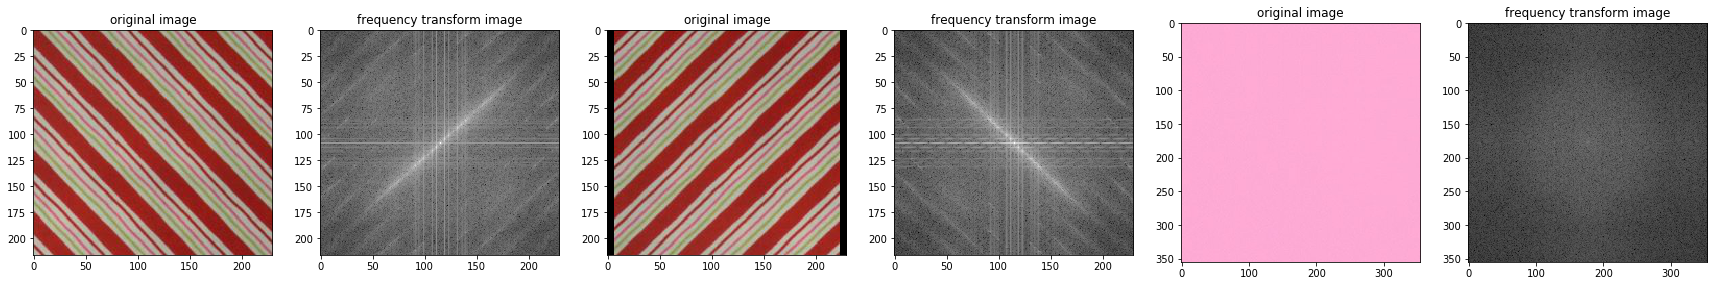

In [12]:
# Call the function on the normalized images
# and display the transforms
f_stripes = ft_image(norm_stripes)
f_stripes_horizontal = ft_image(norm_stripes_horizontal)
f_stripes_diagonal = ft_image(norm_stripes_diagonal)
f_stripes_diagonal_rotated = ft_image(norm_stripes_diagonal_rotated)
f_solid = ft_image(norm_solid)


# display the images
# original images to the left of their frequency transform
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('original image')
ax1.imshow(image_stripes)
ax2.set_title('frequency transform image')
ax2.imshow(f_stripes, cmap='gray')

ax3.set_title('original image')
ax3.imshow(image_stripes_horizontal)
ax4.set_title('frequency transform image')
ax4.imshow(f_stripes_horizontal, cmap='gray')


f, (ax5,ax6,ax7,ax8,ax9,ax10) = plt.subplots(1, 6, figsize=(30,10))

ax5.set_title('original image')
ax5.imshow(image_stripes_diagonal)
ax6.set_title('frequency transform image')
ax6.imshow(f_stripes_diagonal, cmap='gray')

ax7.set_title('original image')
ax7.imshow(image_stripes_diagonal_rotated)
ax8.set_title('frequency transform image')
ax8.imshow(f_stripes_diagonal_rotated, cmap='gray')

ax9.set_title('original image')
ax9.imshow(image_solid)
ax10.set_title('frequency transform image')
ax10.imshow(f_solid, cmap='gray')


Low frequencies are at the center of the frequency transform image. 

The transform images for these example show that the solid image has most low-frequency components (as seen by the center bright spot). 

The stripes tranform image contains low-frequencies for the areas of white and black color and high frequencies for the edges in between those colors. The stripes transform image also tells us that there is one dominating direction for these frequencies; 
#### vertical stripes are represented by a horizontal line passing through the center of the frequency transform image.

#### Nagesh - Observe the Fourier Transform for the Horizontal Stripes. Horizontal stripes are represented by a Vertical line passing through the center of the frequency transform image. 

Next, let's see what this looks like applied to a real-world image.

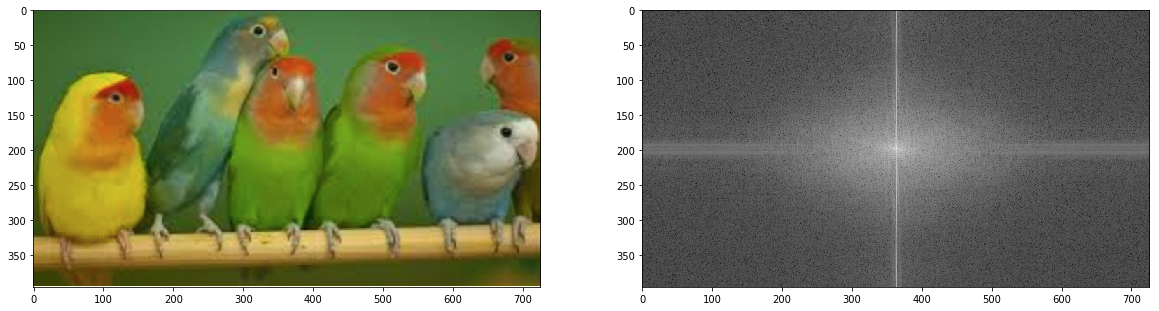

In [4]:
# Read in an image
image = cv2.imread('images/birds.jpg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# normalize the image
norm_image = gray/255.0

f_image = ft_image(norm_image)

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image)
ax2.imshow(f_image, cmap='gray')

Notice that this image has components of all frequencies. You can see a bright spot in the center of the transform image, which tells us that a large portion of the image is low-frequency; this makes sense since the body of the birds and background are solid colors. The transform image also tells us that there are **two** dominating directions for these frequencies; vertical edges (from the edges of birds) are represented by a horizontal line passing through the center of the frequency transform image, and horizontal edges (from the branch and tops of the birds' heads) are represented by a vertical line passing through the center.